In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


In [3]:
immune.combined <- readRDS(file = 'immune_clean_ped_only.rds')

In [4]:
immune.combined <- SetIdent(immune.combined, value = 'stim')
il21 <- subset(immune.combined, idents = c('Unstim', 'IL21'))

In [5]:
rm(immune.combined)

In [6]:
il21

An object of class Seurat 
20222 features across 37243 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 2 other assays present: RNA, ADT
 2 dimensional reductions calculated: pca, umap

# Standard Clustering

In [7]:
DefaultAssay(il21) <- 'RNA'
il21 <- NormalizeData(il21) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA()

Warning message:
“The following arguments are not used: nselect”
Centering and scaling data matrix

PC_ 1 
Positive:  NKG7, CST7, CCL5, APOBEC3G, KLRD1, ZEB2, PRF1, SRGN, STOM, METRNL 
	   NIBAN1, PRR5L, APOBEC3C, NCS1, PIK3AP1, IL2RB, GNLY, C1orf21, GZMB, TENT5C 
	   MXRA7, ANXA1, MAF, GZMH, DUSP2, GZMA, FASLG, ANXA5, CD300A, ARID5B 
Negative:  CCR7, SELL, NELL2, CD55, NOG, KLF2, LTB, IL7R, MYC, ACTN1 
	   CHMP7, PDK1, NHP2, TMEM204, LBH, ITGA6, TXK, LRRN3, CD28, FKBP5 
	   APBA2, TBXA2R, RNF157, SRM, PLAC8, AIF1, FLT3LG, MAL, HSP90AB1, TRAF3IP3 
PC_ 2 
Positive:  GZMH, CD52, FGFBP2, GZMB, ADGRG1, NKG7, PLEK, SYNE1, PRR5L, PRF1 
	   CCL4, GZMA, EOMES, PYHIN1, TBC1D10C, C1orf21, FCGR3A, ITGAL, GNLY, PRSS23 
	   SEPTIN9, AOAH, SPN, ZNF683, FCRL6, CCL5, CX3CR1, SETBP1, SLAMF7, MYO1F 
Negative:  LMNA, AHR, ELL2, ARID5A, GPR183, SGK1, TAF4B, HSP90AB1, FURIN, DENND4A 
	   JMJD1C, YBX3, ZNF267, DDX21, NFKB2, SOCS3, SREBF2, KDSR, BATF, ADGRE5 
	   MYC, RELB, NFKBIA, PIM2, NOP58, ZFP36, AFF1, 

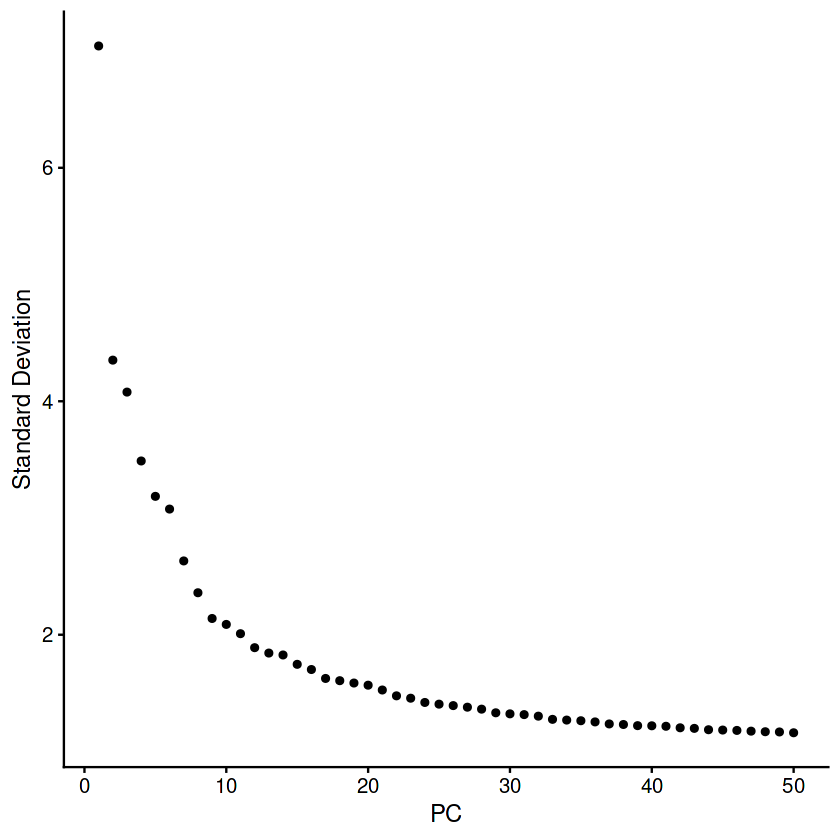

In [8]:
ElbowPlot(il21, ndims = 50)

In [9]:
il21 <- RunUMAP(il21, dims = 1:25) %>% FindNeighbors(dims = 1:25) %>% FindClusters(resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:01:47 UMAP embedding parameters a = 0.9922 b = 1.112

20:01:47 Read 37243 rows and found 25 numeric columns

20:01:47 Using Annoy for neighbor search, n_neighbors = 30

20:01:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:01:52 Writing NN index file to temp file /tmp/RtmplTvQPe/file1e604288ac6eb

20:01:52 Searching Annoy index using 1 thread, search_k = 3000

20:02:08 Annoy recall = 100%

20:02:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 37243
Number of edges: 1058926

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8756
Number of communities: 13
Elapsed time: 22 seconds


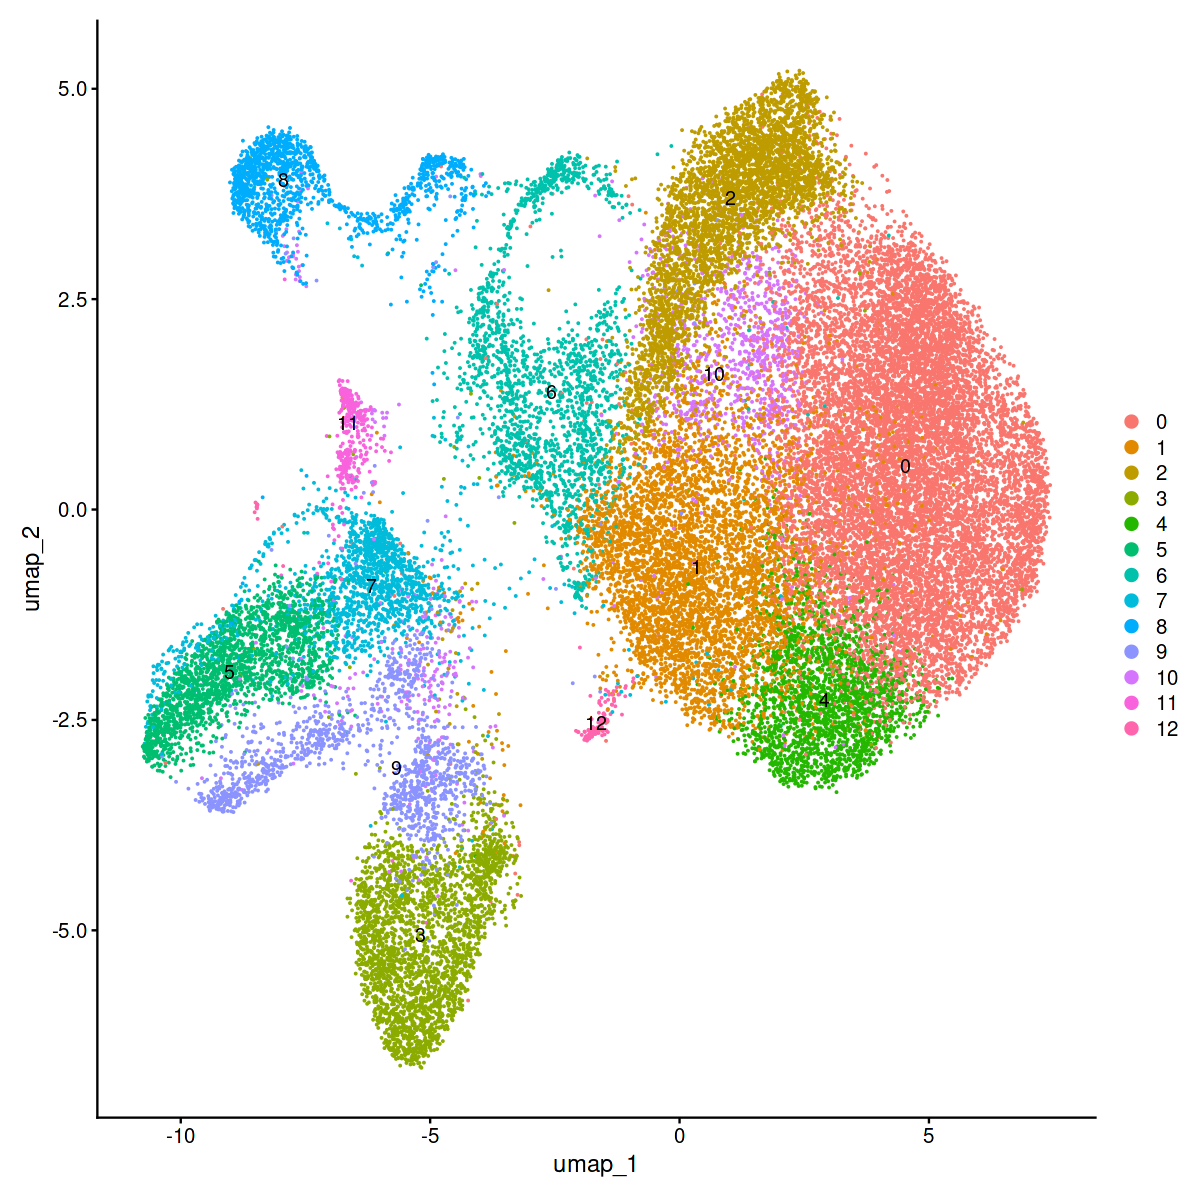

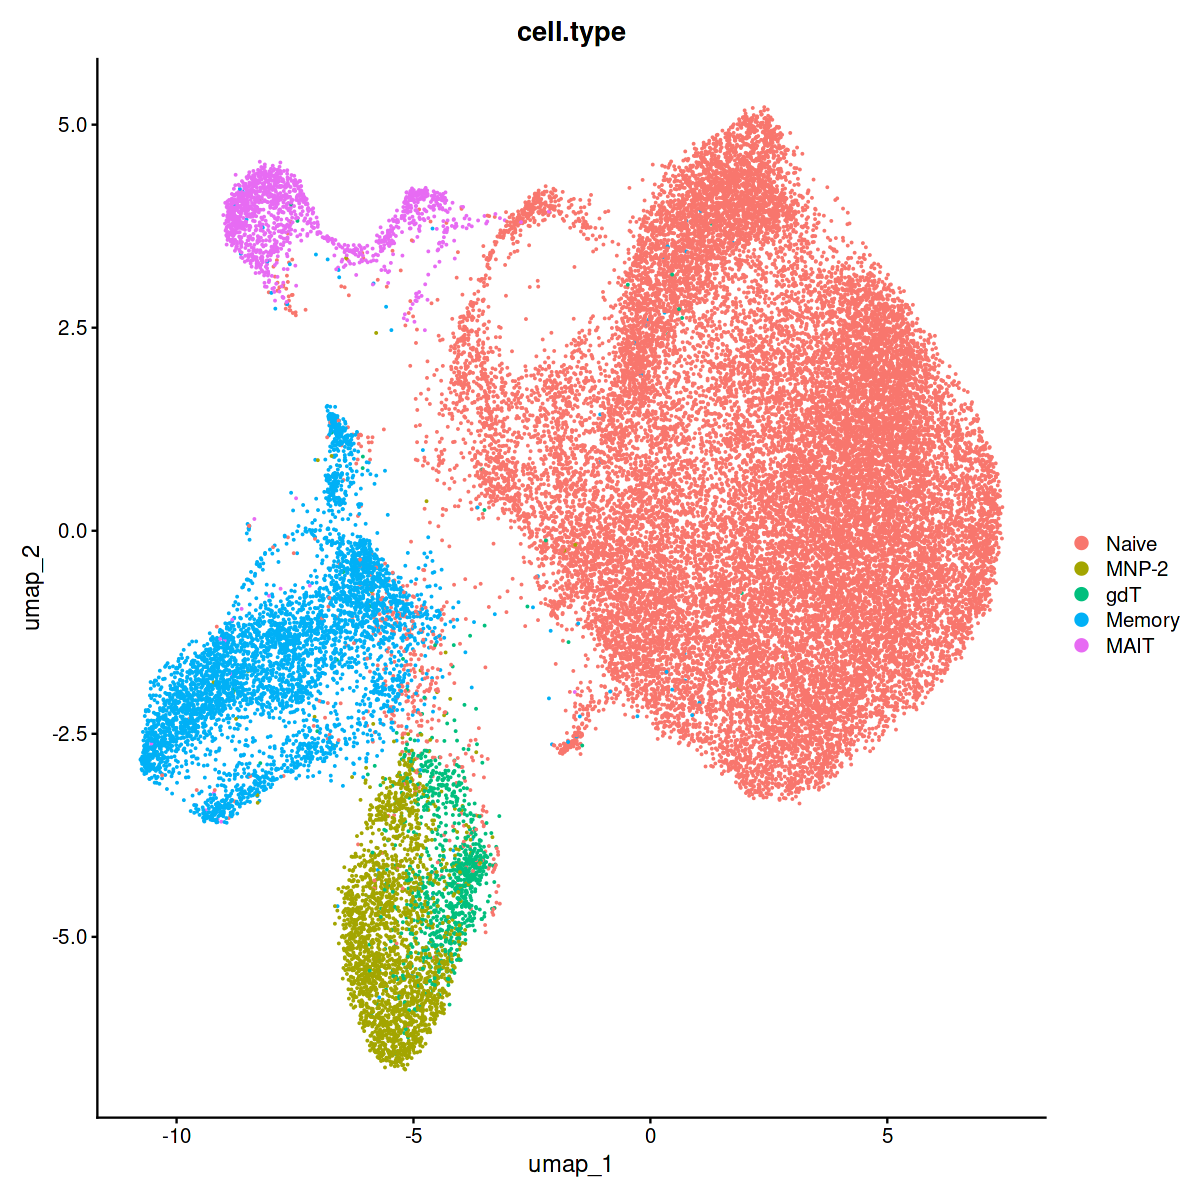

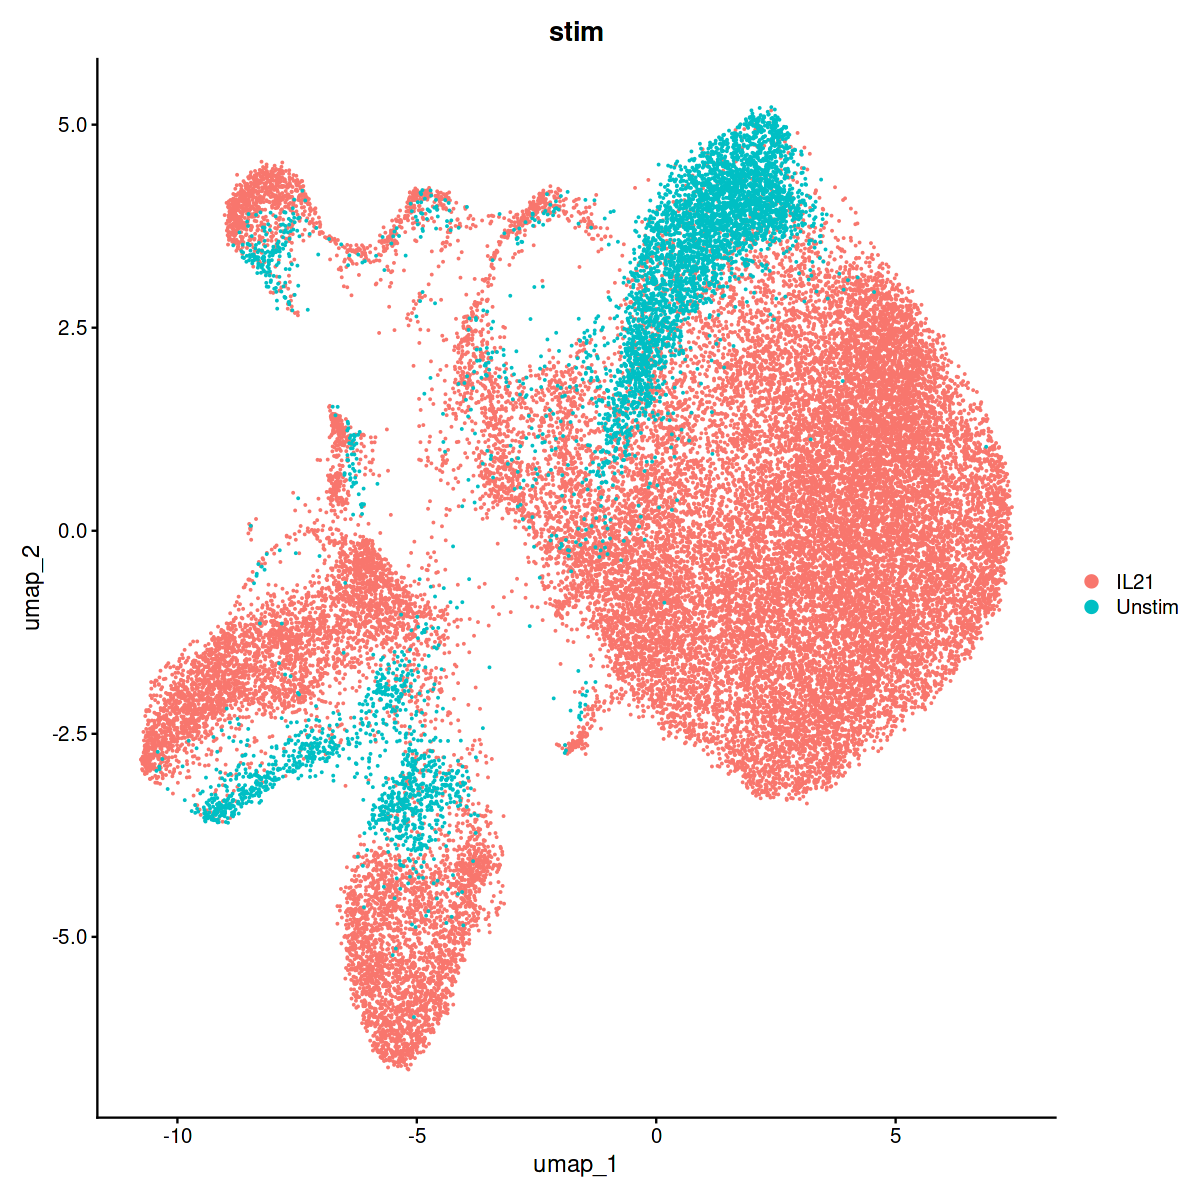

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)
DimPlot(il21, label = TRUE)
DimPlot(il21, group.by = 'cell.type')
DimPlot(il21, group.by = 'stim') 

In [11]:
il21$celltype_stim <- paste0(il21$cell.type, '_', il21$stim)
il21$stim_celltype <- paste0(il21$stim, '_', il21$cell.type)

# Fig 7B

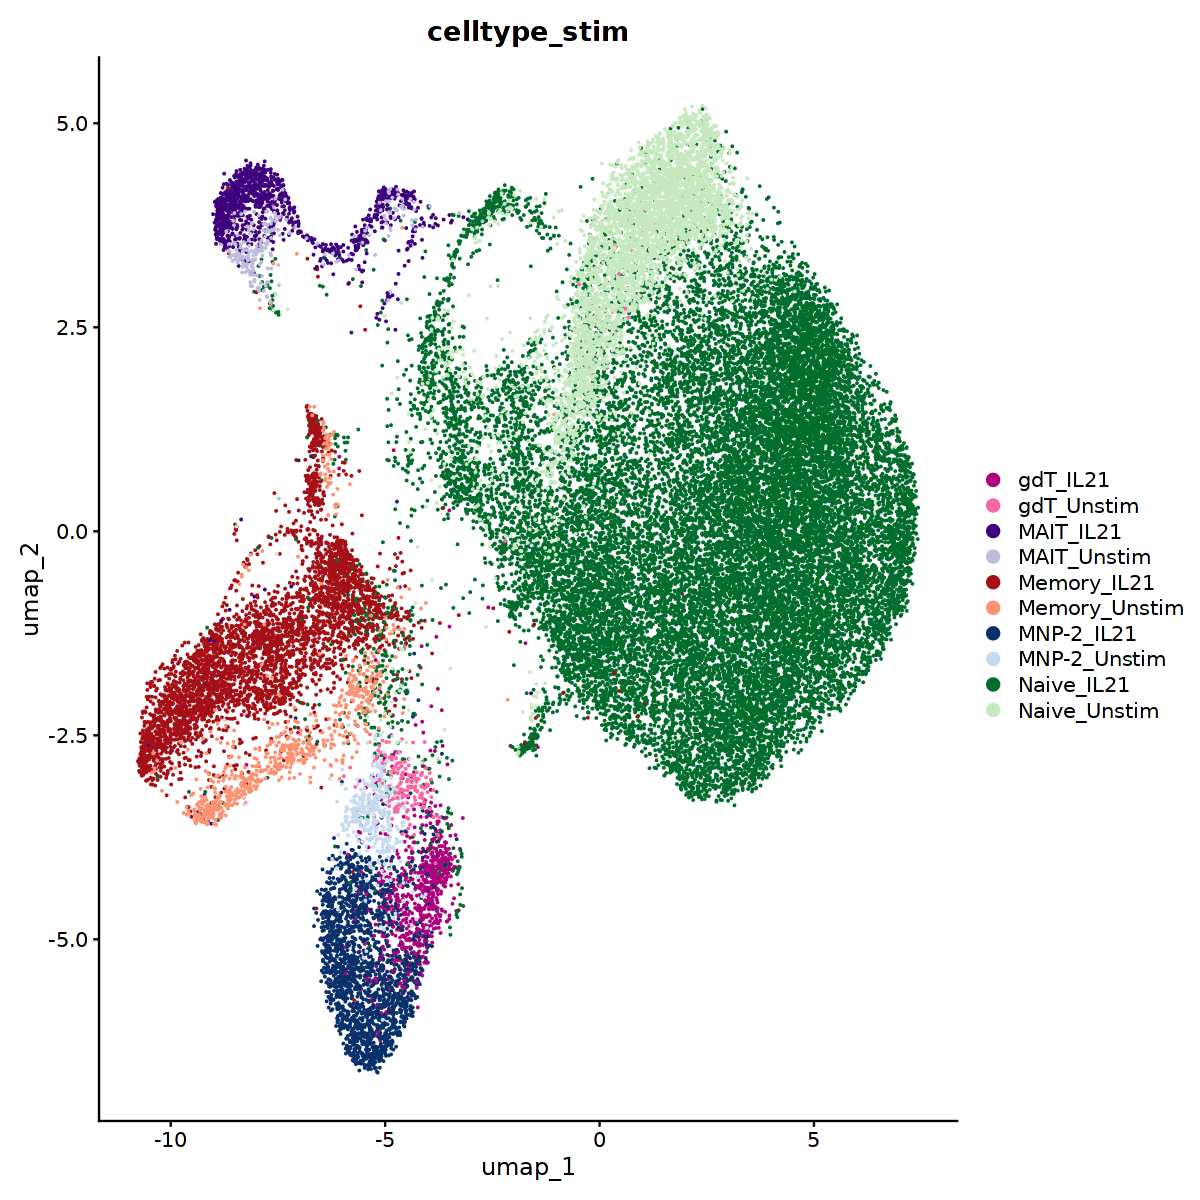

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)
DimPlot(il21, group.by = 'celltype_stim', 
        cols = c('#ae017e','#f768a1',
                 '#3f007d','#bcbddc',
                 '#a50f15','#fc9272',
                 '#08306b','#c6dbef',
                 '#006d2c','#c7e9c0'))

In [18]:
# Open a pdf file
pdf("plots/il21_umap_celltype.pdf", width = 10, height = 10) 
# 2. Create a plot
DimPlot(il21, group.by = 'celltype_stim', 
        cols = c('#ae017e','#f768a1',
                 '#3f007d','#bcbddc',
                 '#a50f15','#fc9272',
                 '#08306b','#c6dbef',
                 '#006d2c','#c7e9c0')) & NoLegend()
# Close the pdf file
dev.off() 

png 
  2

In [29]:
# Open a pdf file
pdf("plots/il21_umap_celltype_w_Legend.pdf", width = 10, height = 10) 
# 2. Create a plot
DimPlot(il21, group.by = 'celltype_stim', 
        cols = c('#ae017e','#f768a1',
                 '#3f007d','#bcbddc',
                 '#a50f15','#fc9272',
                 '#08306b','#c6dbef',
                 '#006d2c','#c7e9c0'))
# Close the pdf file
dev.off() 

png 
  2

# Fig 7C & Extended Fig 9A

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


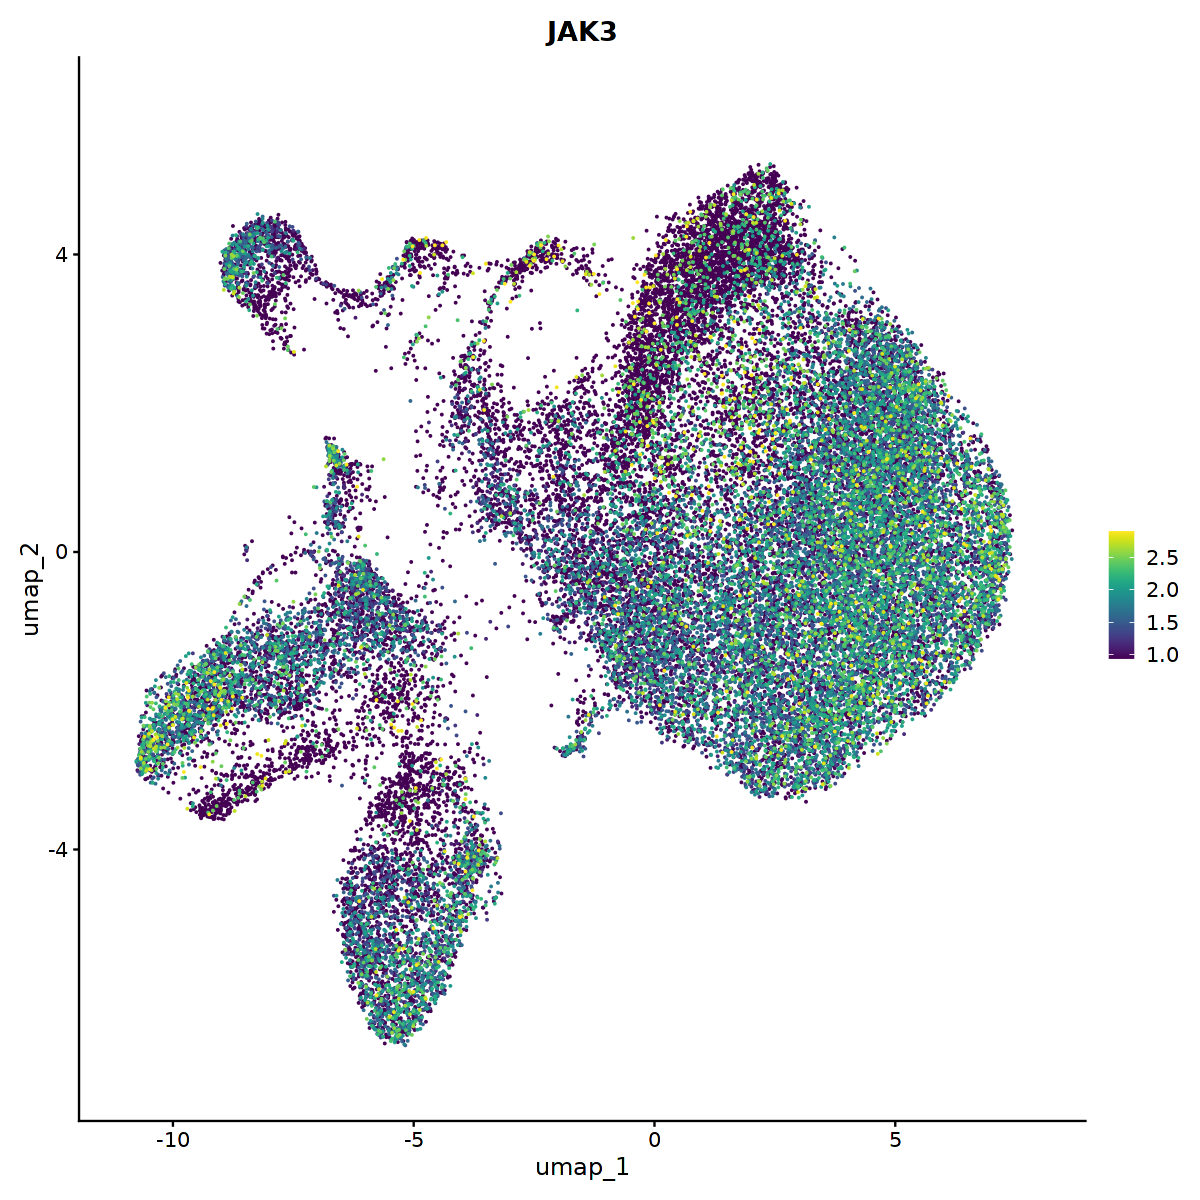

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


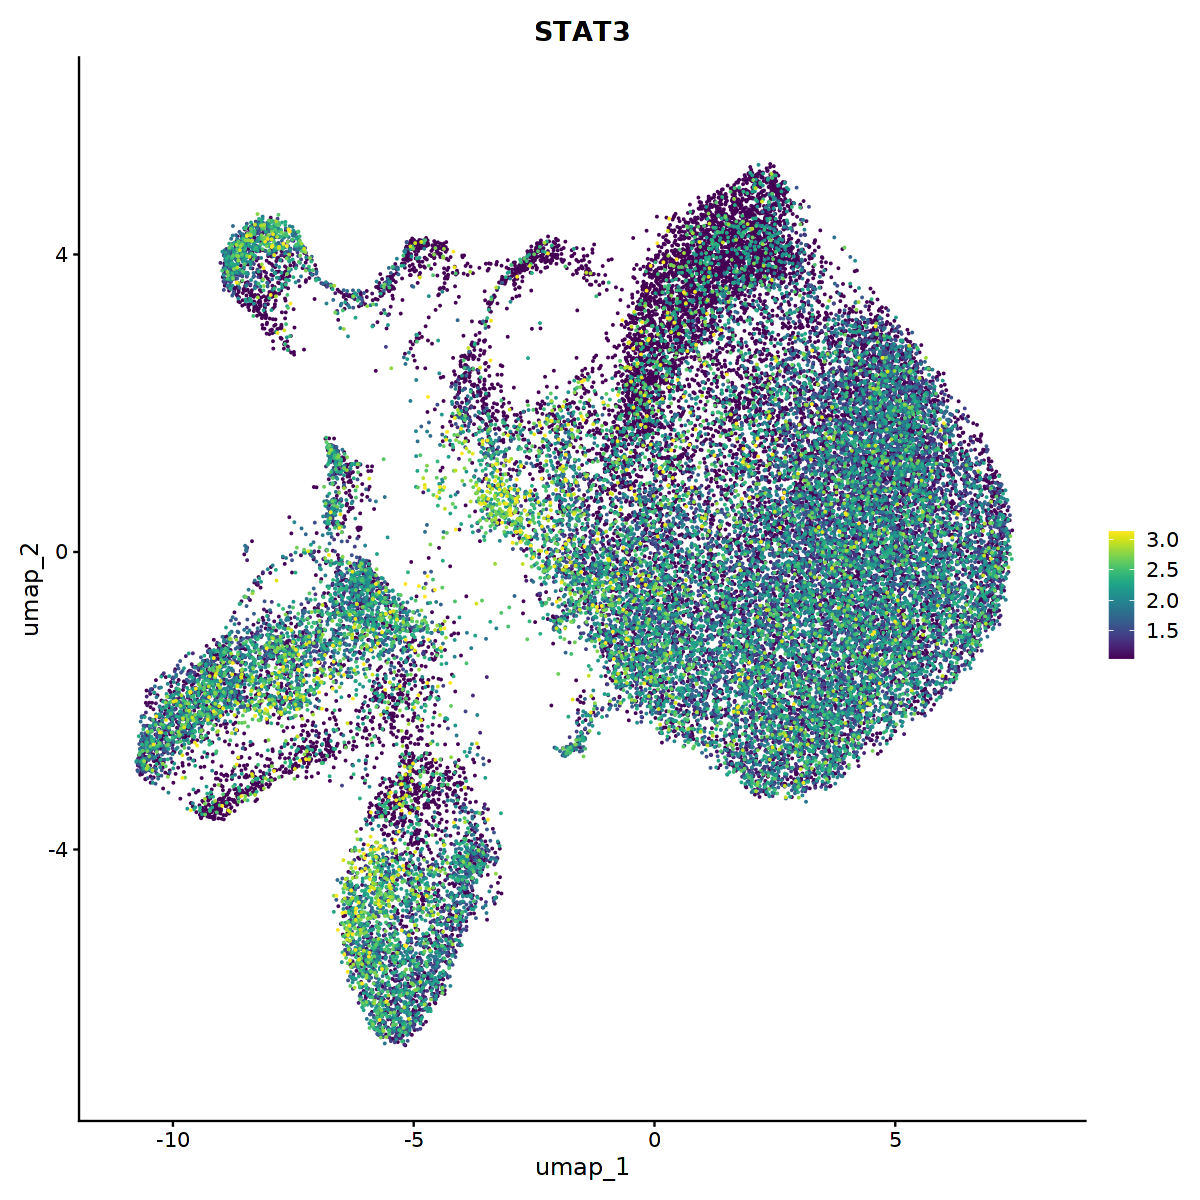

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


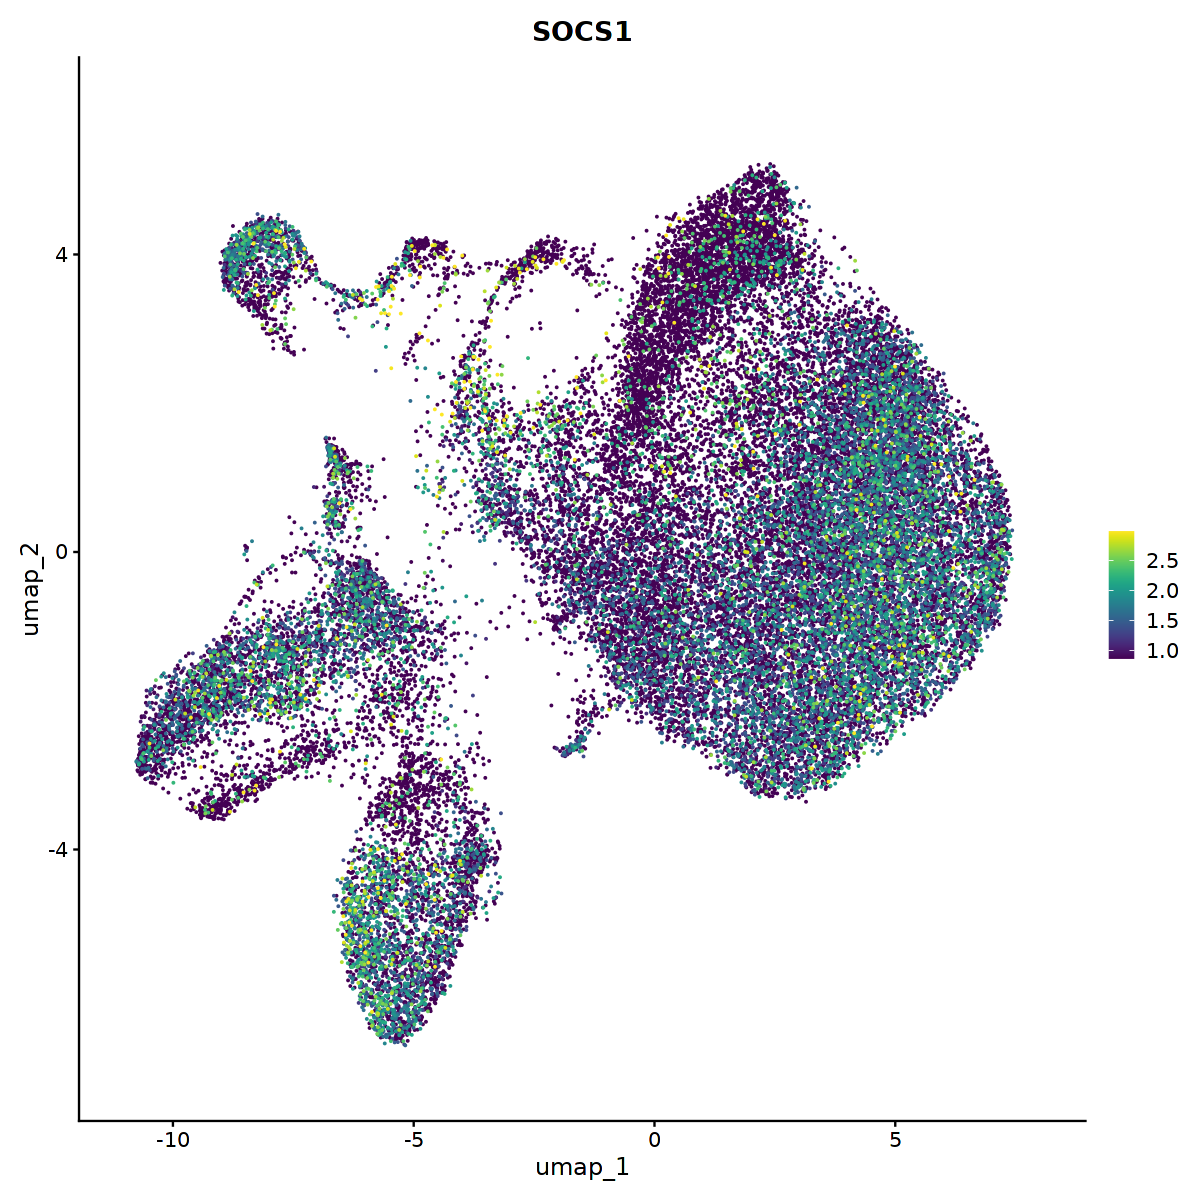

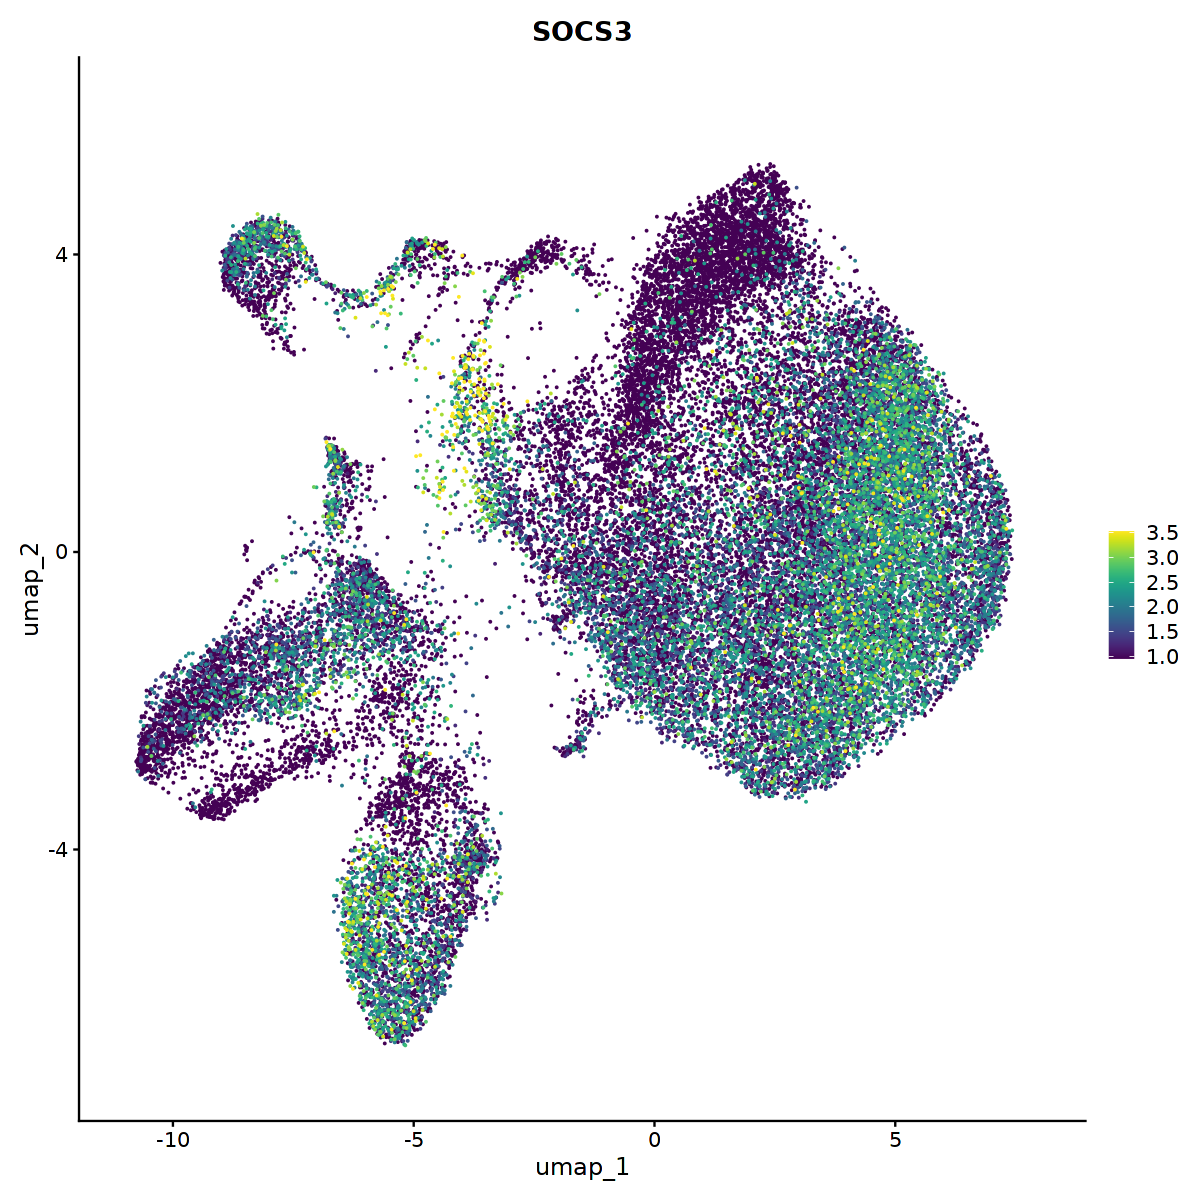

In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)
FeaturePlot(il21, features = 'JAK3', min.cutoff = 'q01', max.cutoff = 'q99',order = TRUE) & scale_colour_viridis()
FeaturePlot(il21, features = 'STAT3', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()
FeaturePlot(il21, features = 'SOCS1', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()
FeaturePlot(il21, features = 'SOCS3', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()

In [22]:
# Open a pdf file
pdf("plots/il21_umap_JAK3.pdf", width = 10, height = 10) 
# 2. Create a plot
FeaturePlot(il21, features = 'JAK3', min.cutoff = 'q01', max.cutoff = 'q99',order = TRUE) & scale_colour_viridis()
# Close the pdf file
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [23]:
# Open a pdf file
pdf("plots/il21_umap_STAT3.pdf", width = 10, height = 10) 
# 2. Create a plot
FeaturePlot(il21, features = 'STAT3', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()
# Close the pdf file
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [24]:
# Open a pdf file
pdf("plots/il21_umap_SOCS1.pdf", width = 10, height = 10) 
# 2. Create a plot
FeaturePlot(il21, features = 'SOCS1', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()
# Close the pdf file
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [25]:
# Open a pdf file
pdf("plots/il21_umap_SOC3.pdf", width = 10, height = 10) 
# 2. Create a plot
FeaturePlot(il21, features = 'SOCS3', min.cutoff = 'q01', max.cutoff = 'q99', order = TRUE) & scale_colour_viridis()
# Close the pdf file
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [12]:
il21 <- SetIdent(il21, value = 'stim')
il21_only <- subset(il21, idents = 'IL21')

In [13]:
il21_only <- SetIdent(il21_only, value = 'cell.type')
il21_only_trim <- subset(il21_only, idents = c('Naive', 'MNP-2', 'Memory'))

In [14]:
il21_only_trim$celltype_sampleID <- paste0(il21_only_trim$cell.type, '_', il21_only_trim$sampleID)

In [15]:
il21_jak_exp <- AverageExpression(il21_only_trim, features = c('JAK3','STAT3','SOCS1','SOCS3'), assay = 'RNA', group.by = 'celltype_sampleID')

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”


In [16]:
il21_jak_exp <- as.data.frame(il21_jak_exp$RNA)

In [17]:
head(il21_jak_exp)
t_il21_jak_exp <- as.data.frame(t(il21_jak_exp))
head(t_il21_jak_exp)

Memory-UP1002 Memory-UP1003 Memory-UP1006 Memory-UP1010 MNP-2-UP1002
JAK3  0.8393285     0.9314159     1.2037037     0.9353383     1.0350      
STAT3 1.5579536     1.8827434     1.7927690     2.3578947     1.9300      
SOCS1 0.7218225     0.7754425     0.6155203     0.9939850     1.1525      
SOCS3 0.8904876     0.9524336     0.7760141     1.5954887     1.7575      
      MNP-2-UP1003 MNP-2-UP1006 MNP-2-UP1010 Naive-UP1002 Naive-UP1003
JAK3  0.9590395    1.1858191    0.8604651    0.9126587    1.0251094   
STAT3 2.1483051    2.1858191    2.5767442    1.2438117    1.3583793   
SOCS1 1.1624294    0.9462103    1.3534884    0.5650891    0.6336313   
SOCS3 2.0084746    2.0415648    2.5372093    1.2040528    1.2942743   
      Naive-UP1006 Naive-UP1010
JAK3  1.1460464    0.9709397   
STAT3 1.3044793    1.6501901   
SOCS1 0.6236497    0.7436176   
SOCS3 1.5357914    1.4562738

JAK3      STAT3    SOCS1     SOCS3    
Memory-UP1002 0.8393285 1.557954 0.7218225 0.8904876
Memory-UP1003 0.9314159 1.882743 0.7754425 0.9524336
Memory-UP1006 1.2037037 1.792769 0.6155203 0.7760141
Memory-UP1010 0.9353383 2.357895 0.9939850 1.5954887
MNP-2-UP1002  1.0350000 1.930000 1.1525000 1.7575000
MNP-2-UP1003  0.9590395 2.148305 1.1624294 2.0084746

In [18]:
t_il21_jak_exp$celltype <- c('Memory','Memory','Memory','Memory','MNP-2','MNP-2','MNP-2','MNP-2','Naive','Naive','Naive','Naive')
# colnames(t_ifng_pma_exp) <- c('IFNG','celltype')
head(t_il21_jak_exp)

JAK3      STAT3    SOCS1     SOCS3     celltype
Memory-UP1002 0.8393285 1.557954 0.7218225 0.8904876 Memory  
Memory-UP1003 0.9314159 1.882743 0.7754425 0.9524336 Memory  
Memory-UP1006 1.2037037 1.792769 0.6155203 0.7760141 Memory  
Memory-UP1010 0.9353383 2.357895 0.9939850 1.5954887 Memory  
MNP-2-UP1002  1.0350000 1.930000 1.1525000 1.7575000 MNP-2   
MNP-2-UP1003  0.9590395 2.148305 1.1624294 2.0084746 MNP-2

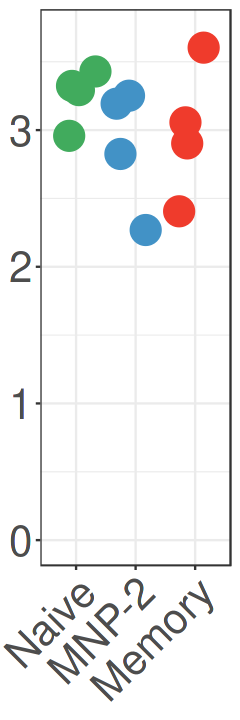

In [39]:
options(repr.plot.width = 2, repr.plot.height = 6)
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = JAK3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,3.7) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')

In [44]:
# Open a pdf file
pdf("plots/il21_JAK3_dot_plot_July23.pdf", width = 2, height = 6) 
# 2. Create a plot
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = JAK3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,3.7) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')
# Close the pdf file
dev.off() 

png 
  2

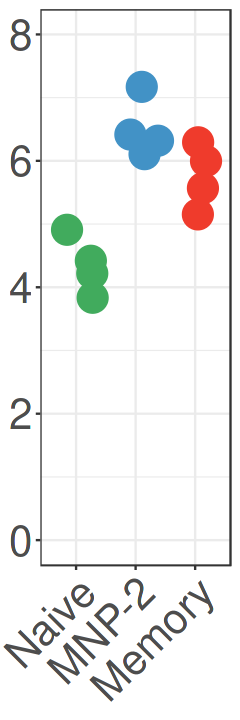

In [41]:
options(repr.plot.width = 2, repr.plot.height = 6)
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = STAT3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,8) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')

In [43]:
# Open a pdf file
pdf("plots/il21_STAT3_dot_plot_July23.pdf", width = 2, height = 6) 
# 2. Create a plot
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = STAT3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,8) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')
# Close the pdf file
dev.off() 

png 
  2

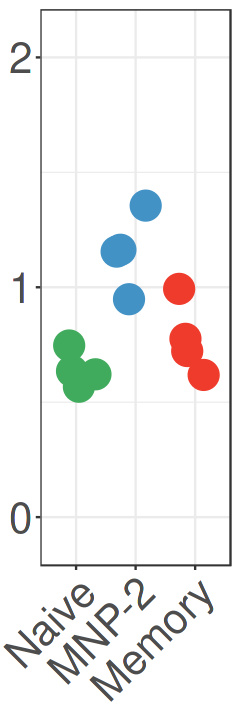

In [30]:
options(repr.plot.width = 2, repr.plot.height = 6)
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = SOCS1, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + scale_y_continuous(breaks = c(0,1,2), limits = c(-0.1,2.1)) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')

In [31]:
# Open a pdf file
pdf("plots/il21_SOCS1_dot_plot_July23.pdf", width = 2, height = 6) 
# 2. Create a plot
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = SOCS1, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + scale_y_continuous(breaks = c(0,1,2), limits = c(-0.1,2.1)) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')
# Close the pdf file
dev.off() 

png 
  2

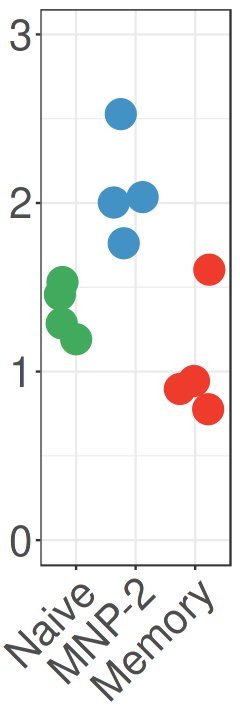

In [23]:
options(repr.plot.width = 2, repr.plot.height = 6)
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = SOCS3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,3) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')

In [32]:
# Open a pdf file
pdf("plots/il21_SOCS3_dot_plot_July23.pdf", width = 2, height = 6) 
# 2. Create a plot
t_il21_jak_exp %>% 
    mutate(celltype = factor(celltype, levels = c('Naive','MNP-2','Memory'))) %>%
    ggplot(aes(x = celltype, y = SOCS3, color = celltype)) + geom_jitter(size=8) + 
        scale_color_manual(values = c('#41ab5d','#4292c6','#ef3b2c')) + ylim(0,3) +
        theme_bw() +
        theme(axis.text.x = element_text(size = 25, angle = 45, vjust = 1, hjust = 1), 
              axis.text.y = element_text(size = 25),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              legend.position = 'none')
# Close the pdf file
dev.off() 

png 
  2

# Fig 7D

In [32]:
il21_split <- SplitObject(il21, split.by = 'cell.type')

In [33]:
deg_list <- lapply(il21_split, function(x){
    degs <- FindMarkers(x, group.by = 'stim', `ident.1` = 'IL21', `ident.2` = 'Unstim')
    return(degs)
})

In [34]:
genes_of_interest <- unique(c(rownames(deg_list$Naive[1:25,]),rownames(deg_list$Memory[1:25,]),rownames(deg_list$MAIT[1:25,]),rownames(deg_list$gdT[1:25,]),
       rownames(deg_list$`MNP-2`[1:25,])))                                                                               

In [19]:
write.csv(deg_list$Naive, file = 'IL21_naive_degs.csv')
write.csv(deg_list$Memory, file = 'IL21_memory_degs.csv')
write.csv(deg_list$MAIT, file = 'IL21_mait_degs.csv')
write.csv(deg_list$`MNP-2`, file = 'IL21_mnp2_degs.csv')

In [30]:
library(pheatmap)

In [35]:
avg_exp <- AverageExpression(il21, assays = 'RNA', features = unique(genes_of_interest), group.by = 'celltype_stim')

In [36]:
avg_exp <- as.data.frame(avg_exp$RNA)

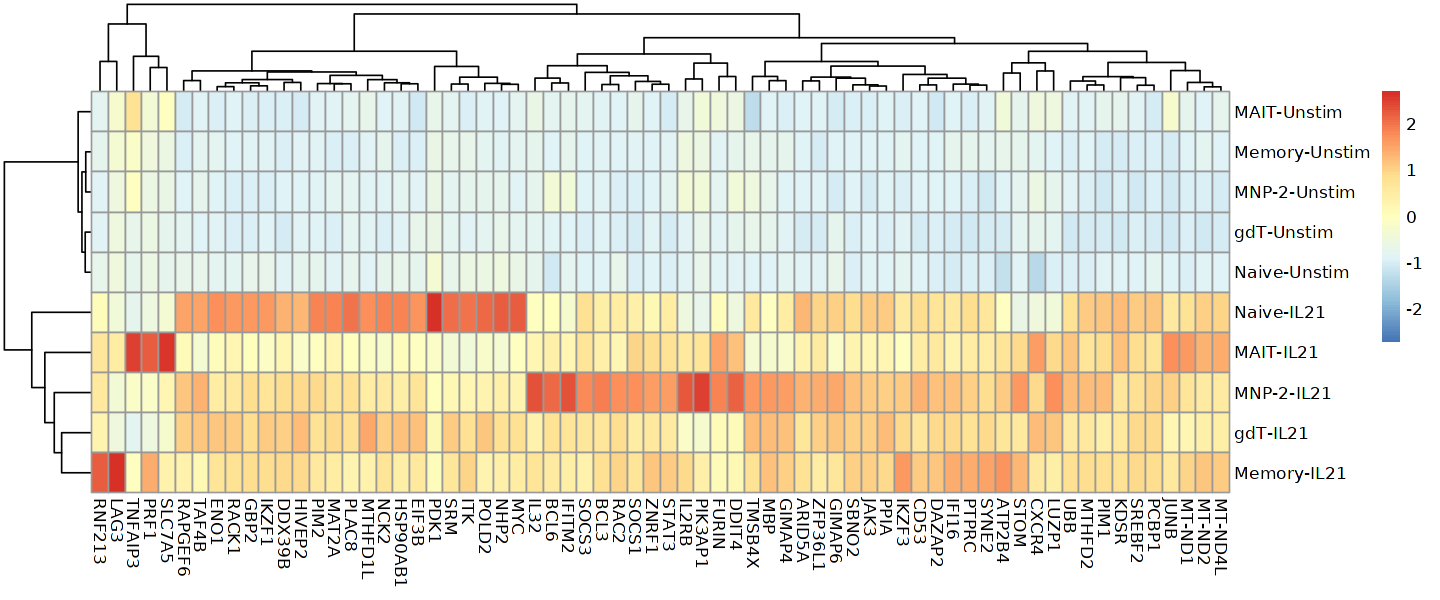

In [40]:
options(repr.plot.width = 12, repr.plot.height = 5)
p <- pheatmap(t(avg_exp), scale = 'column')

In [41]:
save_pheatmap_pdf <- function(x, filename, width=12, height=5) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(p, "plots/il21_heatmap.pdf")

png 
  2

# Fig 7e

In [45]:
il21 <- SetIdent(il21, value = 'stim')
stim_only <- subset(il21, idents = 'IL21')

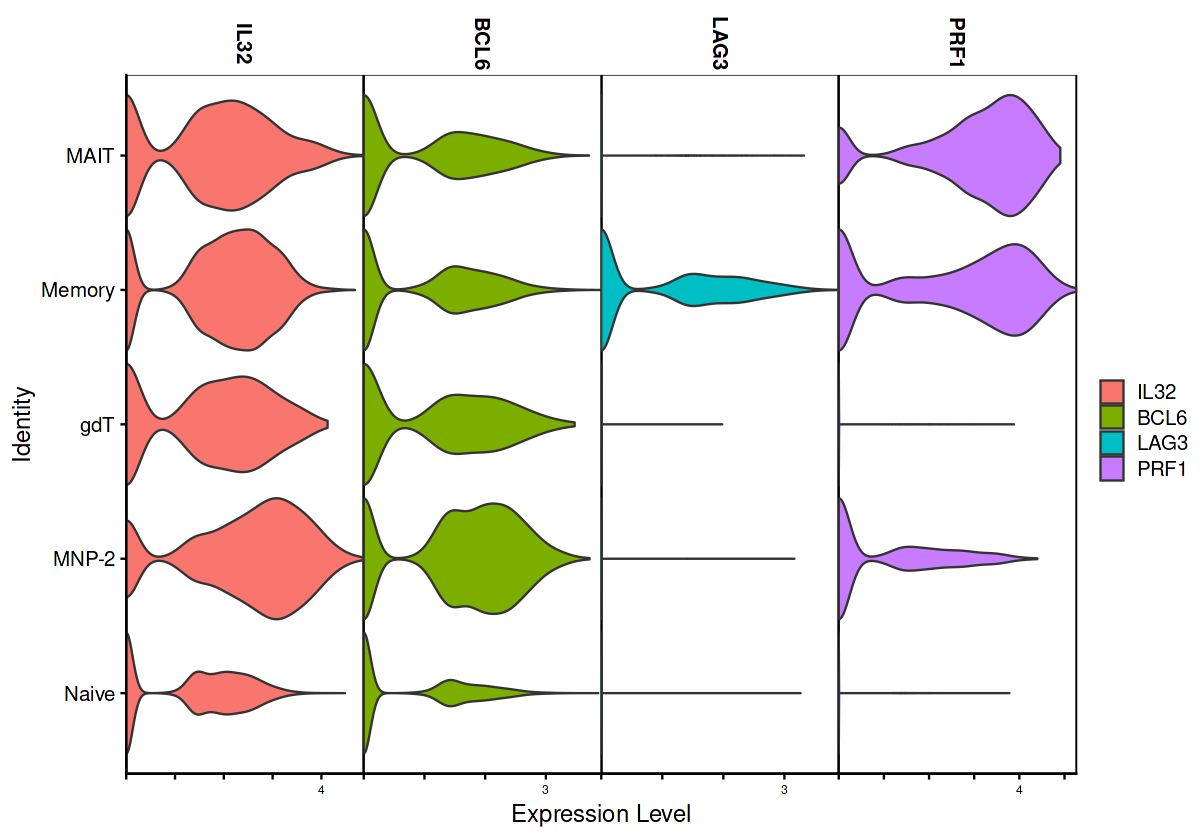

In [46]:
options(repr.plot.width = 10, repr.plot.height = 7)
stim_only <- SetIdent(stim_only, value = 'cell.type')
VlnPlot(stim_only, features = c('IL32','BCL6','LAG3','PRF1'), pt.size = 0, stack = TRUE)

In [47]:
# Open a pdf file
pdf("plots/il21_vlnplot_July.pdf", width = 10, height = 7) 
# 2. Create a plot
stim_only <- SetIdent(stim_only, value = 'cell.type')
VlnPlot(stim_only, features = c('IL32','BCL6','LAG3','PRF1'), pt.size = 0, stack = TRUE)
# Close the pdf file
dev.off() 

png 
  2

# Extended Fig 9B

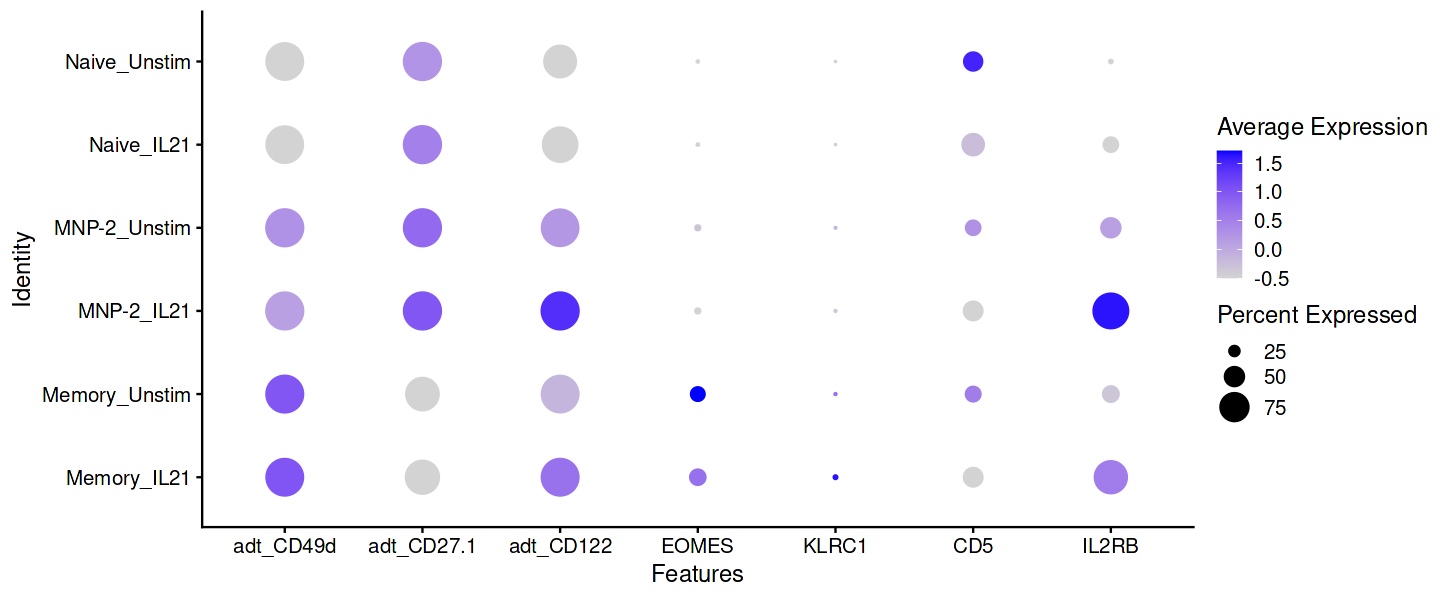

In [20]:
options(repr.plot.width = 12, repr.plot.height = 5)
DotPlot(il21_trim, features = c('adt_CD49d','adt_CD27.1','adt_CD122','EOMES','KLRC1','CD5','IL2RB'), group.by = 'celltype_stim', col.min = -0.5, dot.scale = 10)

In [21]:
# Open a pdf file
pdf("plots/il21_dot_plot_July23.pdf", width = 12, height = 5) 
# 2. Create a plot
DotPlot(il21_trim, features = c('adt_CD49d','adt_CD27.1','adt_CD122','EOMES','KLRC1','CD5','IL2RB'), group.by = 'celltype_stim', col.min = -0.5, dot.scale = 10)
# Close the pdf file
dev.off() 

png 
  2